# sscws Example IDL Jupyter Notebook
This [notebook](https://jupyter.org/) demonstrates using the [sscws](/WebServices/REST/SscIdlLibrary.html) IDL library to access data from [sscweb](https://sscweb.gsfc.nasa.gov/) in the [IDL](https://www.nv5geospatialsoftware.com/docs/IDL_Kernel.html) programming language.  This notebook is for the IDL version of cdasws. A notebook for the Python version is available at [python sscws notebook](../jupyter/SscWsExample.html).  This notebook contains the following sections:

1. [Installation](#Installation)
2. [Setup](#Setup)
3. [Get Observatories](#Get-Observatories)
4. [Get Ground Stations](#Get-Ground-Stations)
5. [Get Locations](#Get-Locations)
6. [Additional Documentation](#Additional-Documentation)

## Installation
The following contains the procedure to install the [sscws](/WebServices/REST/SscIdlLibrary.html) IDL library into your IDL environment. There are different procedures for different versions of IDL.

### IDL 8.7.1 and higher
If you have an old version of the SPDF_SSC package already installed, remove the old version.

In [ ]:
ipm, /remove, 'SPDF_SSC'

Package "SPDF_SSC" was removed

If the lastest version of the SPDF_SSC package is not already installed, install it as shown below.

In [1]:
ipm, /install, 'https://sscweb.gsfc.nasa.gov/WebServices/REST/SPDF_SSC.zip'

Package: SPDF_SSC, Version: 2.3.13 installed

You only need to install a particular version of the package once. You will need to restore the package everytime you restart your IDL session. Restore the package as shown below.

In [3]:
restore, !package_path + '/SPDF_SSC/spdfssc.sav'

### IDL 8.4.0 and newer
Download and restore [spdfssc.sav](https://sscweb.gsfc.nasa.gov/WebServices/REST/spdfssc.sav). You will need to restore the package everytime you restart your IDL session.

In [ ]:
savFilename = filepath('spdfssc.sav', /tmp)
oUrl = obj_new('IDLnetUrl')
;  For IDL installations with old root certificates
oUrl->setProperty, SSL_VERIFY_PEER=0
savFilename = oUrl->get(filename=savFilename, url='https://sscweb.gsfc.nasa.gov/WebServices/REST/spdfssc.sav')
restore, savFilename

## Setup
Create an SpdfSsc object that will be used in the code that follows.

In [4]:
ssc = obj_new('SpdfSsc')

## Get Observatories
The following code demonstrates how to get the list of available observatories.

In [9]:
foreach obs, (ssc->getObservatories())[0:4] do begin
    caldat, obs->getStartTime(), m, d, y, h, m, s
    print, obs->getId(), obs->getName(), y, m, d, h, m, s, $
          format='%15s %25s %4d-%02d-%02dT%02d:%02d:%02dZ'
endforeach
print, '...'
end

ace ACE 1997-48-25T17:48:00Z
 active Active 1989-00-29T00:00:00Z
 aec AE-C 1973-01-17T08:01:00Z
 aed AE-D 1975-00-17T00:00:00Z
 aee AE-E 1975-04-20T21:04:00Z
...

## Get Ground Stations
The following code demonstrates how to get the list of available ground stations.

In [10]:
foreach station, (ssc->getGroundStations())[0:4] do begin
    location = station->getLocation()
    lat = location->getLatitude()
    lon = location->getLongitude()
    print, station->getId(), station->getName(), lat, lon, $
           format='%5s %25s %7.2f %7.2f'
endforeach
print, '...'
end

SPA South Pole -89.99 -13.32
 MCM McMurdo -77.85 166.70
 SBF Scott Base -77.85 166.75
 SPL Siple -76.00 -84.00
 HBA Halley Bay -75.52 -26.60
...

## Get Locations
The following code gets location information for the International Space Station (ISS) spacecraft and plots the ISS location information.

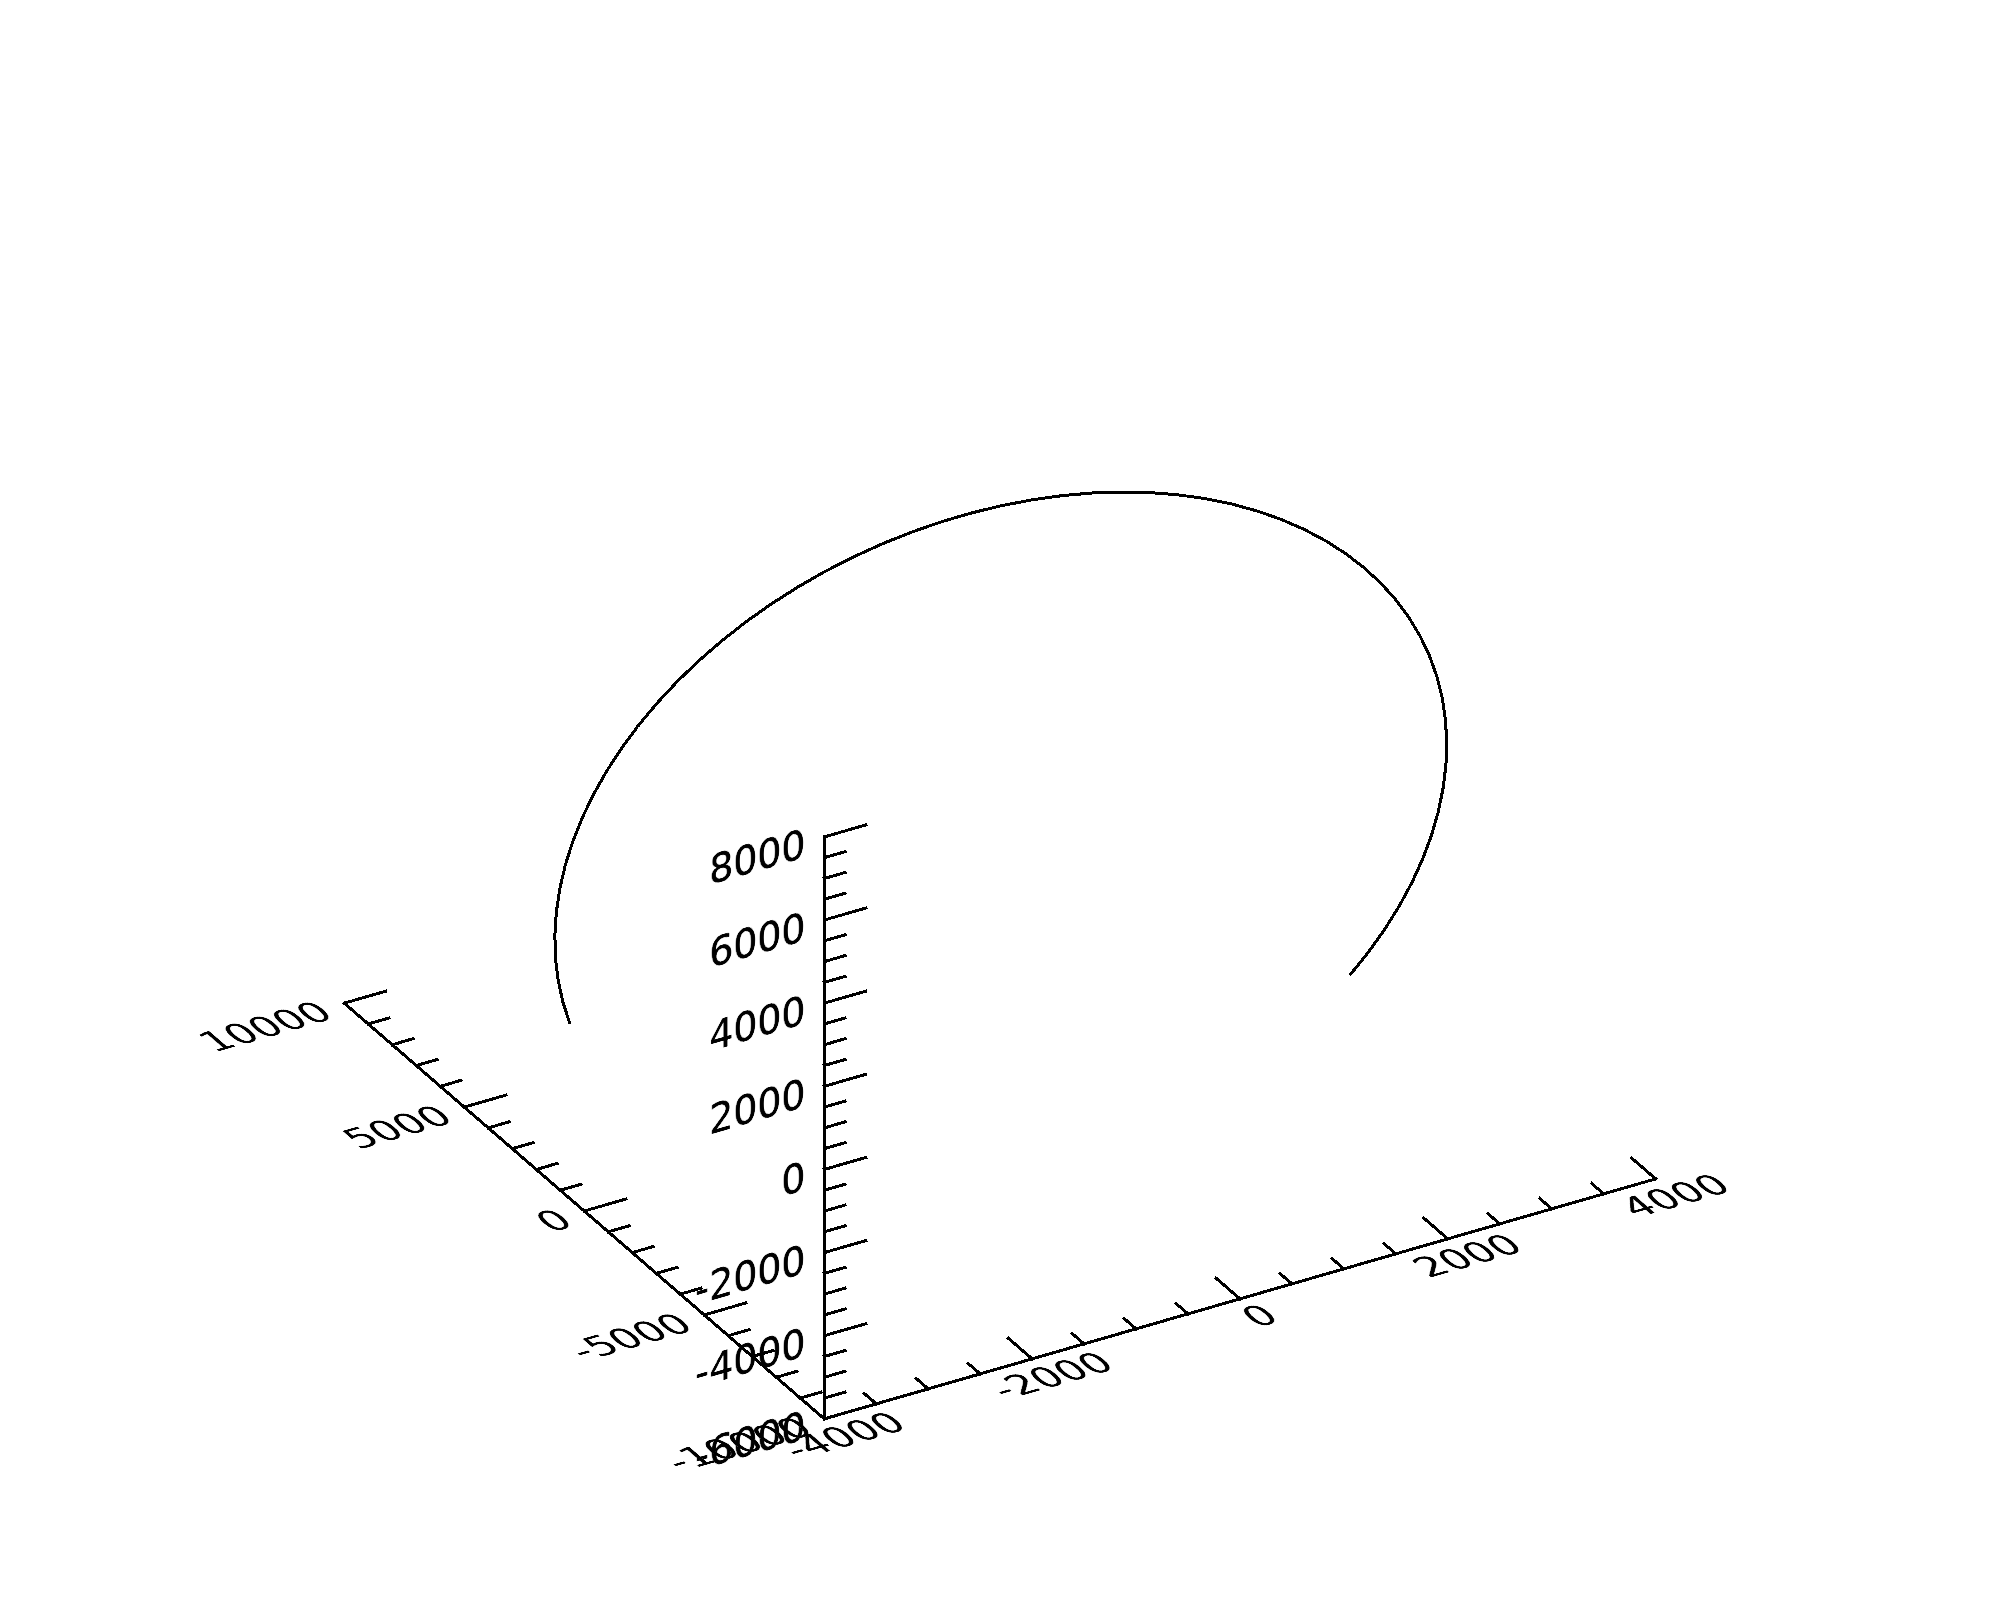

In [11]:
l = spdfGetLocations('iss', ['2013-01-01T00:00:00.000Z', '2013-01-01T01:00:00.000Z'])
p = plot3d(l->getX(), l->getY(), l->getZ(), window_title='Orbit')

## Additional Documentation
View the [sscsws API](../idl/api/) for additional functions.